# European social survey

In [1]:
# Let's get ready to data!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline


ess_combined = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/ess_combined_2012_2014.csv")
ess_combined.info()
ess_combined.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8147 entries, 0 to 8146
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   cntry    8147 non-null   object
 1   idno     8147 non-null   int64 
 2   year     8147 non-null   int64 
 3   tvtot    8147 non-null   int64 
 4   ppltrst  8147 non-null   int64 
 5   pplfair  8147 non-null   int64 
 6   pplhlp   8147 non-null   int64 
 7   happy    8147 non-null   int64 
 8   sclmeet  8147 non-null   int64 
 9   sclact   8147 non-null   int64 
 10  gndr     8147 non-null   int64 
 11  agea     8147 non-null   int64 
 12  partner  8147 non-null   int64 
dtypes: int64(12), object(1)
memory usage: 827.6+ KB


,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5,6,3,3,10,5,8,5,4,2,60,1
1,CH,25,6,6,5,7,5,9,3,2,2,59,1
2,CH,26,6,1,8,8,8,7,6,3,1,24,2
3,CH,28,6,4,6,6,7,10,6,2,2,64,1
4,CH,29,6,5,6,7,5,8,7,2,2,55,1


In [2]:
# Split into two DataFrames for ease of analysis

ess_2012 = ess_combined[ess_combined['year']==6]

ess_2014 = ess_combined[ess_combined['year']==7]

print(ess_2012.head())
print(ess_2014.head())

  cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  sclact  \
0    CH     5     6      3        3       10       5      8        5       4   
1    CH    25     6      6        5        7       5      9        3       2   
2    CH    26     6      1        8        8       8      7        6       3   
3    CH    28     6      4        6        6       7     10        6       2   
4    CH    29     6      5        6        7       5      8        7       2   

   gndr  agea  partner  
0     2    60        1  
1     2    59        1  
2     1    24        2  
3     2    64        1  
4     2    55        1  
    cntry  idno  year  tvtot  ppltrst  pplfair  pplhlp  happy  sclmeet  \
732    CH     5     7      2        8        9       7      9        6   
733    CH    25     7      4        4        2       5      6        5   
734    CH    26     7      3        8        8       6      8        7   
735    CH    28     7      2        7        7       5      9        6   

###1. Did people become less trusting from 2012 to 2014? 



DescribeResult(nobs=4071, minmax=(0, 10), mean=5.578481945467944, variance=4.893040545067073, skewness=-0.5431086926347095, kurtosis=-0.1210956960964813)
DescribeResult(nobs=4076, minmax=(0, 10), mean=5.5713935230618254, variance=4.927171652708959, skewness=-0.4601859476512641, kurtosis=-0.25006786100787215)


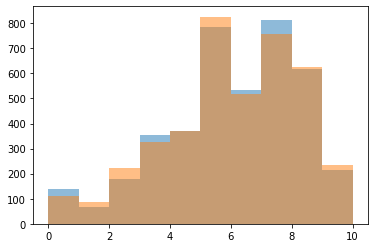

In [3]:
plt.hist(ess_2012['ppltrst'], alpha = .5)
plt.hist(ess_2014['ppltrst'], alpha = .5)

# Remember that Shapiro test is sensitive to large samples. 

stats.shapiro(ess_2012['ppltrst'])
stats.shapiro(ess_2014['ppltrst'])

print(stats.describe(ess_2012['ppltrst']))
print(stats.describe(ess_2014['ppltrst']))


# This is normally distributed.

In [ ]:
stats.ttest_ind(ess_2012['ppltrst'], ess_2014['ppltrst'])


Ttest_indResult(statistic=0.1443685081969842, pvalue=0.8852130548889106)

Fail to reject the null -- there is no significant difference in trust between 2012 to 2014.

### 2. Did people become happier from 2012 to 2014? 


DescribeResult(nobs=4071, minmax=(0, 10), mean=7.731515598133137, variance=3.0819524689826823, skewness=-1.1505518232802756, kurtosis=1.9055890346061979)
DescribeResult(nobs=4076, minmax=(0, 10), mean=7.6854759568204125, variance=2.840436853164115, skewness=-1.0296465664009635, kurtosis=1.5218046596567287)


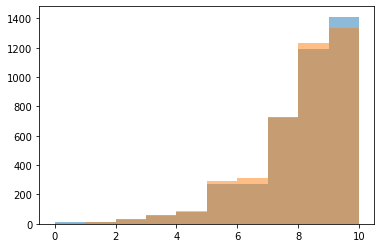

In [4]:
# Variable happy

plt.hist(ess_2012['happy'], alpha = .5)
plt.hist(ess_2014['happy'], alpha = .5)

print(stats.describe(ess_2012['happy']))
print(stats.describe(ess_2014['happy']))

# Not normally distributed

In [ ]:
# Because not normally distributed
# We will use Kruskal-Wallis

stats.kruskal(
    ess_2012['happy'],
    ess_2014['happy'])

# p-value is right at the cut-off. Based on visual inspection I will fail 
# to reject the null and conclude that all data samples
# are drawn from the same distribution.

KruskalResult(statistic=3.725441202182227, pvalue=0.05358946830655459)


### 3. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?


In [ ]:
# How many unique countries are there?

ess_2014['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23892b0c88>,
      dtype=object)

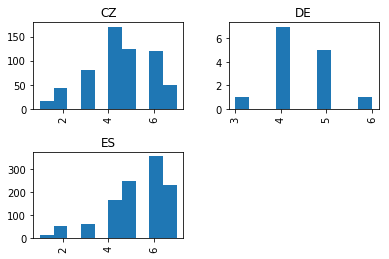

In [ ]:
# I am going to pick CZ, DE and ES

filter_list = ['CZ', 'DE', 'ES']
ess_2014_cz_de_es = ess_2014[ess_2014['cntry'].isin(filter_list)]

ess_2014_cz_de_es['cntry'].unique()

ess_2014_cz_de_es['sclmeet'].hist(by = ess_2014_cz_de_es['cntry'])

In [ ]:
# these are sparser samples of ordinal data
# so nothing will be perfectly "normal,"
# we will have to "eyeball" it.
# we will do a Kruskal Wallis test

stats.kruskal(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclmeet']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclmeet']])

KruskalResult(statistic=120.72958033262947, pvalue=6.0800161031835895e-27)

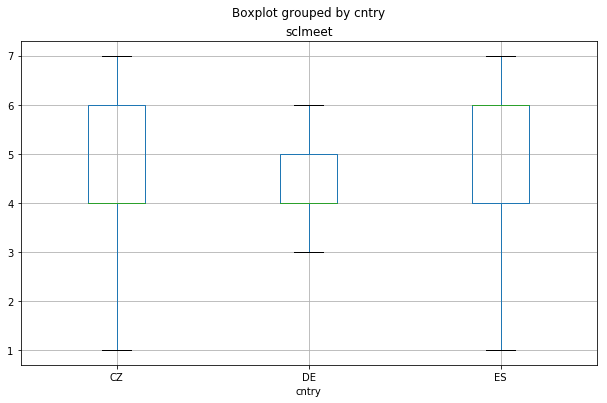

In [ ]:
# It appears that not all medians are equal, so
# Which one is the odd country out?
# I'm thinking DE

ess_2014_cz_de_es.boxplot('sclmeet', by='cntry', figsize=(10, 6))


### 4. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23892c9710>,
      dtype=object)

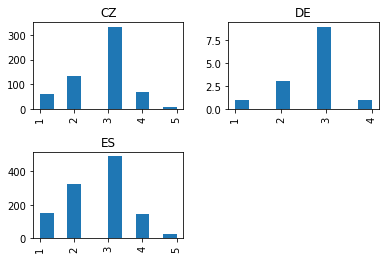

In [ ]:
# Variable sclact
# I will stick with the same countries as above

ess_2014_cz_de_es['sclact'].hist(by = ess_2014_cz_de_es['cntry'])

# These look a little more normal to me. 
# At least they are symmetrical.
# So let's do a one-way ANOVA.


In [ ]:
stats.f_oneway(
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'CZ',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'DE',['sclact']],
    ess_2014_cz_de_es.loc[ess_2014_cz_de_es['cntry'] == 'ES',['sclact']])

# No significant difference in groups.


F_onewayResult(statistic=array([2.28963493]), pvalue=array([0.10160666]))

In [ ]:
# Let's check pairwise statistics with Tukey's HSD.

from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog = ess_2014_cz_de_es['sclact'],      # Data
                          groups = ess_2014_cz_de_es['cntry'],   # Groups
                          alpha=0.05) 


tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
CZ,DE,-0.0151,0.9,-0.5946,0.5644,False
CZ,ES,-0.098,0.0841,-0.2058,0.0099,False
DE,ES,-0.0829,0.9,-0.6594,0.4936,False


# Ruff Figural Fluency Test

In [ ]:
# https://www.parinc.com/Products/Pkey/360
# https://datadryad.org/resource/doi:10.5061/dryad.rr138

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

rfft = pd.read_csv("https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/rfft.csv")
rfft.head()

,Casenr,Age,Gender,Education,Measurement,Unique,Perseverative,Interval
0,1,74,Male,Lower secondary school (ISCED 2),Measurement 1 (2003-2006),32.0,1.0,Not applicable
1,1,74,Male,Lower secondary school (ISCED 2),Measurement 2 (2006-2008),35.0,0.0,2.842122556
2,1,74,Male,Lower secondary school (ISCED 2),Measurement 3 (2008-2012),50.5,14.5,2.201232033
3,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 1 (2003-2006),26.0,3.0,Not applicable
4,2,48,Male,Higher secondary school (ISCED 3-4),Measurement 2 (2006-2008),47.0,3.0,2.762718362


## 1. Is there a significant difference in the number of unique designs drawn by the same participants from Measurement 2 to Measurement 3?

In [ ]:
# To ease in our analysis let's pivot the data.

rfft_unique = rfft.pivot(index='Casenr', columns='Measurement', values='Unique')
rfft_unique.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,32.0,35.0,50.5
2,26.0,47.0,71.0
3,91.0,83.5,77.0
4,59.0,54.0,64.0
5,60.0,68.0,21.0


DescribeResult(nobs=2515, minmax=(-75.5, 68.5), mean=4.015506958250497, variance=342.2368318331855, skewness=-0.15837265462838976, kurtosis=0.7823714353134701)


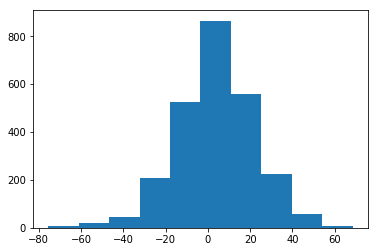

In [ ]:
# The differences appear normally distributed.
# So we ill use a paired t-test.

plt.hist(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)'])
print(stats.describe(rfft_unique['Measurement 3 (2008-2012)'] - rfft_unique['Measurement 2 (2006-2008)']))

In [ ]:

stats.ttest_rel(rfft_unique['Measurement 3 (2008-2012)'], rfft_unique['Measurement 2 (2006-2008)'])

Ttest_relResult(statistic=10.88544039426271, pvalue=5.3585747477799544e-27)

Yes, there appears to be a significant difference between unique designs by the same participants between Measurements 2 and 3.

## 2. Is there a significant difference in the number of perseverative errors drawn by the same participants from Measurement 2 to Measurement 3?

In [ ]:
# Again, let's pivot the data

rfft_persev = rfft.pivot(index='Casenr', columns='Measurement', values='Perseverative')
rfft_persev.head()

Measurement,Measurement 1 (2003-2006),Measurement 2 (2006-2008),Measurement 3 (2008-2012)
Casenr,,,
1,1.0,0.0,14.5
2,3.0,3.0,0.5
3,11.0,21.0,17.0
4,49.0,39.0,11.0
5,14.0,16.0,0.0


(array([1.821e+03, 4.560e+02, 1.210e+02, 5.200e+01, 2.800e+01, 1.600e+01,
        1.300e+01, 3.000e+00, 4.000e+00, 1.000e+00]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 ]),
 <a list of 10 Patch objects>)

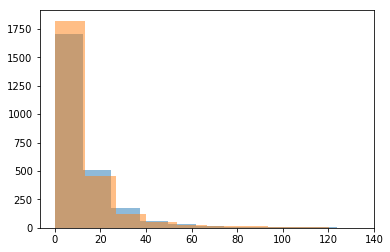

In [ ]:
# Looks quite non-normal, so we'll use Wilcoxon

plt.hist(rfft_persev['Measurement 3 (2008-2012)'], alpha = .5)
plt.hist(rfft_persev['Measurement 2 (2006-2008)'], alpha = .5)

In [ ]:
# Reject the null, there is a significant difference between perseverative errors
# from the same participants at Measurements 2 and 3

stats.wilcoxon(rfft_persev['Measurement 3 (2008-2012)'], rfft_persev['Measurement 2 (2006-2008)'])

WilcoxonResult(statistic=1358373.0, pvalue=0.0006927535563546565)